# Preparing the Files


In [ ]:
!unzip /content/test.zip

In [ ]:
!unzip /content/hi.zip

In [ ]:
!unzip /content/background.zip

In [ ]:
!mv /content/background /content/training

In [ ]:
!mv /content/hi /content/training

In [ ]:
!mv /content/test /content/test_1

# Preprocessing


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(validation_split = 0.2,rescale=1/255)
'''
                            rotation_range=10, 
                            zoom_range=0.1,  
                            width_shift_range=0.1,
                            height_shift_range=0.1, 
                            horizontal_flip=True,  
                            vertical_flip=True, 
'''
# Tried the above data augmentation, but it hindered accuracy possibly due to 
# already augmented data set
                     
train_generator = datagen.flow_from_directory(
        '/content/training',  
        target_size=(64, 64), 
        batch_size=32,
        subset = 'training',
        class_mode='binary',
        shuffle = True)


validation_generator = datagen.flow_from_directory(
        '/content/training', 
        subset = 'validation', 
        class_mode = 'binary',
        #batch_size = 32,
        shuffle =True,
        target_size=(64, 64)
        )

Found 4700 images belonging to 2 classes.
Found 1175 images belonging to 2 classes.


# Building the Model 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, pooling, AveragePooling2D, MaxPooling2D, Dropout
from keras.callbacks import EarlyStopping
model = Sequential()

model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

# Pruned extra layers as model was overfitting 

#model.add(Conv2D(32, kernel_size=3, activation='relu'))
#model.add(MaxPooling2D())
#model.add(Dropout(0.4)) 

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())
model.add (Dropout(0.2))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Early stopping wasn't as useful
#early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)


model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 29, 29, 64)        9280      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 256)      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit_generator(train_generator,
epochs=50,
verbose=1,
validation_data = validation_generator,
steps_per_epoch=train_generator.samples/train_generator.batch_size,
validation_steps=validation_generator.samples/validation_generator.batch_size,
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
146/146 [==============================] - 5s 28ms/step - loss: 0.5519 - accuracy: 0.7500 - val_loss: 0.4441 - val_accuracy: 0.8043
Epoch 2/50
146/146 [==============================] - 4s 26ms/step - loss: 0.3543 - accuracy: 0.8536 - val_loss: 0.2661 - val_accuracy: 0.9132
Epoch 3/50
146/146 [==============================] - 4s 26ms/step - loss: 0.2863 - accuracy: 0.8962 - val_loss: 0.2209 - val_accuracy: 0.9157
Epoch 4/50
146/146 [==============================] - 4s 25ms/step - loss: 0.2401 - accuracy: 0.9155 - val_loss: 0.1700 - val_accuracy: 0.9404
Epoch 5/50
146/146 [==============================] - 4s 26ms/step - loss: 0.1894 - accuracy: 0.9353 - val_loss: 0.1490 - val_accuracy: 0.9447
Epoch 6/50
146/146 [==============================] - 4s 26ms/step - loss: 0.1833 - accuracy: 0.9391 - val_loss: 0.1450 - val_accuracy: 0.9523
Epoch 7/50
146/146 [==============================] - 4s 25ms/step - loss: 0.1546 - accuracy: 0.9460 - val_loss: 0.1633 - val_accuracy: 0.9404

# Visualizing the training process and results

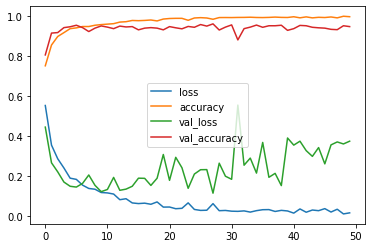

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

losses = pd.DataFrame(model.history.history)
losses
losses.plot()

Text(0.5, 1.0, 'Training')

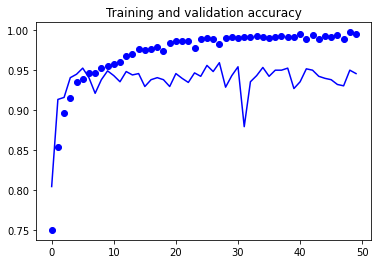

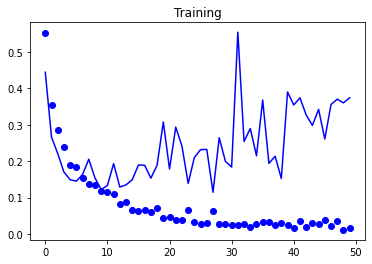

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training')

# Saving the model and loading test data

In [ ]:
model.save('ai hack 2.0')

INFO:tensorflow:Assets written to: ai hack 2.0/assets


In [ ]:
test_image_gen = ImageDataGenerator(rescale=1/255.)
test_generator = test_image_gen.flow_from_directory('/content/test_1', target_size=(64,64), batch_size=1,
                                                   seed=2, class_mode=None, shuffle=False)

Found 98 images belonging to 1 classes.


In [ ]:
y_pred=model.predict_generator(generator=test_generator, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


98/98 [==============================] - 0s 2ms/step


In [ ]:
test_generator.reset()
y_pred = model.predict(test_generator)

In [ ]:
train_generator.class_indices

{'background': 0, 'hi': 1}

In [ ]:
y_pred_classification = np.where(y_pred > 0.5, 1, 0)
y_pred_classification

In [ ]:
import os
DIR_TEST = "/content/test_1/test"
test_imgs = os.listdir(DIR_TEST)

test_imgs =  sorted(test_imgs)

In [ ]:

os.renames('/content/test_1/test/2.jpg', '/content/test_1/test/02.jpg')
os.renames('/content/test_1/test/3.jpg', '/content/test_1/test/03.jpg')
os.renames('/content/test_1/test/4.jpg', '/content/test_1/test/04.jpg')
os.renames('/content/test_1/test/5.jpg', '/content/test_1/test/05.jpg')
os.renames('/content/test_1/test/6.jpg', '/content/test_1/test/06.jpg')
os.renames('/content/test_1/test/7.jpg', '/content/test_1/test/07.jpg')
os.renames('/content/test_1/test/8.jpg', '/content/test_1/test/08.jpg')
os.renames('/content/test_1/test/9.jpg', '/content/test_1/test/09.jpg')



In [ ]:
import pandas as pd
df_test = pd.DataFrame({'Filename':test_imgs})
df_test.head()

,Filename
0,01.jpg
1,02.jpg
2,03.jpg
3,04.jpg
4,05.jpg


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_dataframe(
    df_test,
    directory = "/content/test_1/test",
    x_col = 'Filename',
    y_col = None,
    class_mode = None,
    target_size = (64,64),
    batch_size = 32,
    shuffle = False
)

Found 98 validated image filenames.


In [ ]:
pred = model.predict(test_generator, 
                     steps = np.ceil(df_test.shape[0]/32))

In [ ]:
np.set_printoptions(suppress=True)

pred[:5]

array([[1.        ],
       [0.00000228],
       [1.        ],
       [0.        ],
       [1.        ]], dtype=float32)

In [ ]:
category = []
for x in pred[:,0]:
    category.append(1 if x > 0.5 else 0)
    
df_test['Category'] = category

df_test.head()

,Filename,Category
0,01.jpg,1
1,02.jpg,0
2,03.jpg,1
3,04.jpg,0
4,05.jpg,1


In [ ]:
df_test.to_csv('Results.csv')

# END